# Neural networks

credit: https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

# The Perceptron
Let’s start our discussion by talking about the Perceptron! A perceptron has one or more inputs, a bias, an activation function, and a single output. The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output. There are many possible activation functions to choose from, such as the logistic function, a trigonometric function, a step function etc. We must also make sure to add a bias to the perceptron, a constant weight outside of the inputs that allows us to achieve better fit for our predictive models. Check out the diagram below for a visualization of a perceptron:

<img src="perceptron.png">

Once we have the output we can compare it to a known label and adjust the weights accordingly (the weights usually start off with random initialization values). We keep repeating this process until we have reached a maximum number of allowed iterations, or an acceptable error rate. If we use the logistic function (also known as a sigmoid) then this looks an awful lot like logistic regression.

To create a neural network, we simply begin to add layers of perceptrons together, creating a multi-layer perceptron model of a neural network. You’ll have an input layer which directly takes in your data and an output layer which will create the resulting outputs. Any layers in between are known as hidden layers because they don’t directly “see” the feature inputs within the data you feed in or the outputs. For a visualization of this check out the diagram below (source: Wikipedia).

<img src="neural-network.png">

Keep in mind that due to their nature, neural networks tend to work better on GPUs than on CPU. The sci-kit learn framework isn’t built for GPU optimization. If you want to continue using GPUs and distributed models, take a look at some other frameworks, such as Google’s open sourced TensorFlow.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix


# Read the data

In [ ]:
wine = pd.read_csv('wine-data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash",
                                             "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

display(wine.head())
display(wine.Cultivator.unique())


# Train-test split

In [54]:
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [66]:
X.columns
y.unique()

array([1, 2, 3])

# Data pre-processing

The neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [55]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the model

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn.

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the Multi-Layer Perceptron (MLP) model. There are many ways to choose these numbers. We might choose 3 layers with the same number of neurons as there are features in our data (13, 13, 13), but for illustration we'll start with two hidden layers with 7 and 4 nodes, respectively, and we'll set the max number of iterations to 500.

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(7, 4),max_iter=500)
# mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13),max_iter=500)


Now that the model has been made we can fit the training data to our model, remember that this data has already been processed and scaled:

In [ ]:
mlp.fit(X_train,y_train)

You can see the output that shows the default values of the other parameters in the model. I encourage you to play around with them and discover what effects they have on your neural network in Python!

# Predictions and Evaluation
Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:

In [59]:
predictions = mlp.predict(X_test)

Now we can use SciKit-Learn’s built in metrics such as a classification report and confusion matrix to evaluate how well our model performed:

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
print(classification_report(y_test,predictions))

Not bad! Looks like we only misclassified one bottle of wine in our test data! This is pretty good considering how few lines of code we had to write for our neural network in Python. The downside however to using a Multi-Layer Perceptron model is how difficult it is to interpret the model itself. The weights and biases won’t be easily interpretable in relation to which features are important to the model itself.

However, if you do want to extract the MLP weights and biases after training your model, you use its public attributes coefs_ and intercepts_.

coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.

intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [67]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))


This dataset has 13 input nodes and 3 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 13x7 (13 nodes feeding into a layer of 7 nodes)
  1: 7x4 (7 nodes feeding into a layer of 4 nodes)
  2: 4x3 (4 nodes feeding into a layer of 3 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [7, 4, 3] intercepts, one for each node


# Draw the neural network
Red means a negative weight, blue means positive. This code does not draw intercepts.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotl

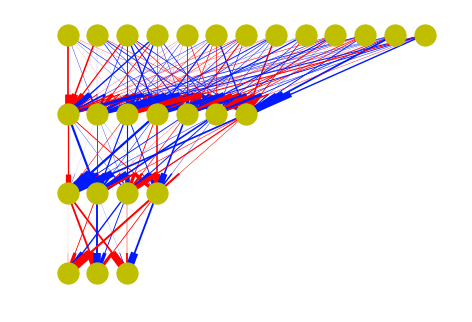

In [62]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)